The reaction-diffusion system described here involves two generic chemical species U and V, whose concentration at a given point in space is referred to by variables u and v. As the term implies, they react with each other, and they diffuse through the medium. Therefore the concentration of U and V at any given location changes with time and can differ from that at other locations.

The overall behavior of the system is described by the following formula, two equations which describe three sources of increase and decrease for each of the two chemicals:


$$
\begin{array}{l}
\displaystyle \frac{\partial u}{\partial t} = D_u \Delta u - uv^2 + F(1-u) \\
\displaystyle \frac{\partial v}{\partial t} = D_v \Delta v + uv^2 - (F+k)v
\end{array}
$$


The classic Euler scheme is used to integrate the time derivative.

[Reaction-Diffusion by the Gray-Scott Model: Pearson's Parametrization](https://mrob.com/pub/comp/xmorphia/)

## Initialization

$u = 1$ everywhere et $v = 0$ in the domain except in a square zone where $v = 0.25$ and $ u = 0.5$. This square located in the center of the domain is  $[0, 1]\times[0,1]$ with a size of $0.2$.

Parameters:

In [117]:
Du, Dv = .1, .05
F, k = 0.0545, 0.062

In [118]:
%matplotlib inline

(-0.05, 1.05, -0.05, 1.05)

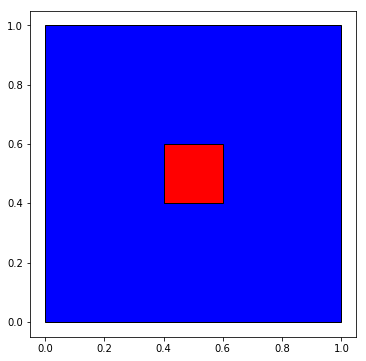

In [119]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

plt.axes()

ext_domain = plt.Rectangle((0,0), 1, 1, ec="k", fc="b")
int_domain = plt.Rectangle((0.4,0.4), 0.2, 0.2, fc="r", ec="k")
ax = plt.gca()
ax.add_patch(ext_domain)
ax.add_patch(int_domain)
plt.axis('scaled')

To represent values of $u$ and $v$ on the mesh we will use numpy arrays. Numpy provides `ndarray` multi-dimensional array object
and derived objects such as masked arrays and matrices. It provides also a set of functions for fast array mathematical operations.

It was initially developed by [Travis Oliphant](https://www.continuum.io/people/travis-oliphant).

# Getting Started with NumPy

- It is handy to import everything from NumPy into a Python console:
```python
from numpy import *
```
- But it is easier to read and debug if you use explicit imports.
```python
import numpy as np
```

In [120]:
import numpy as np
print(np.__version__)

1.16.1


# Why Arrays ?

Let's try to compute the laplacian using Python lists

The laplacian is computed with the following numerical scheme

$$
\Delta u_{i,j} \approx u_{i,j-1} + u_{i-1,j} -4u_{i,j} + u_{i+1, j} + u_{i, j+1}
$$

Let's write a list of lists that represents $u$, its size is set to 1000 by 1000. Write function that takes this list of lists in input and return
a new list of lists for $\Delta u$.

In [121]:
nx, ny = 100, 100
dx, dy = 1./nx, 1./ny

u, v = [], []
for i in range(nx):
    u.append([0 for j in range(ny)])
    
for i in range(nx):
    for j in range(ny):
        if 400 < i < 600 and 400 < j < 600:
            u[i][j] = 0.5

In [122]:
def laplacian_python(u):
    
    delta_u = u.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            delta_u[i][j] = u[i][j-1]+u[i-1][j] \
                             -4*u[i][j]+u[i+1][j]+u[i][j+1]
    
    return delta_u

In [123]:
%timeit laplacian_python(u)

5.87 ms ± 23.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Numpy Arrays

- There are important differences between NumPy arrays and Python lists:
    - NumPy arrays have a fixed size at creation.
    - NumPy arrays elements are all required to be of the same data type.
    - NumPy arrays operations are performed in compiled code for performance.
- Most of today's scientific/mathematical Python-based software use NumPy arrays.
- NumPy gives us the code simplicity of Python, but the operation is speedily executed by pre-compiled C code.

### Replace the list by a numpy array

In [124]:
u = np.array(u)

In [125]:
import numpy_html
np.set_printoptions(threshold=2, edgeitems=4)
u

0,0,0,0,⋯,0,0,0,0
0,0,0,0,⋯,0,0,0,0
0,0,0,0,⋯,0,0,0,0
0,0,0,0,⋯,0,0,0,0
⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮
0,0,0,0,⋯,0,0,0,0
0,0,0,0,⋯,0,0,0,0
0,0,0,0,⋯,0,0,0,0
0,0,0,0,⋯,0,0,0,0


### Laplacian for numpy array

In [126]:
def laplacian_numpy_with_loops(u):
    
    delta_u = np.zeros_like(u)
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            delta_u[i,j] = u[i,j-1]+u[i-1,j] \
                             -4*u[i,j]+u[i+1,j]+u[i,j+1]
    
    return delta_u

In [127]:
%timeit laplacian_numpy_with_loops(u)

13.4 ms ± 58.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Performance are not much better because of loops. If you want to get some spped using numpy you need to vectorize your operations.

For example if we want to ompute derivative of $f(x) = \sin(x)$ with finite difference method.
$$
    \frac{\partial f}{\partial x} \sim \frac{f(x+dx)-f(x)}{dx}
$$

derivatives values are centered in-between sample points.

Numpy provides the linspace function that returns an array of values equally spaced. You can also use the $sin$ function applied to all elements of $x$. Element wise operations are the “default mode”.

In [128]:
x, dx = np.linspace(0,4*np.pi,100, retstep=True)
y = np.sin(x)

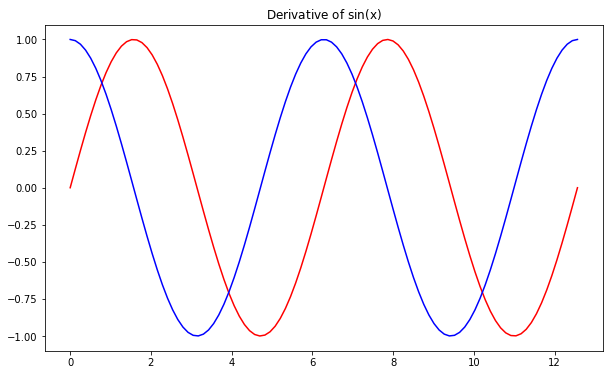

In [129]:
plt.plot(x, np.sin(x), 'r', x, np.cos(x),'b')
plt.title(r"$\rm{Derivative\ of}\ \sin(x)$");

We will use the numpy array slicing `x[lower:upper:step]` to vectorize
the derivative computation. It extracts a portion of a sequence by specifying a lower and upper bound. be aware that the lower-bound element is included, but the upper-bound element is **not** included. The default step value is 1 and can be negative.

In [130]:

a = np.array([10,11,12,13,14])
a[:2], a[-5:-3], a[0:2], a[-2:] # negative indices work

(array([10, 11]), array([10, 11]), array([10, 11]), array([13, 14]))

In [131]:
a[::2], a[::-1]

(array([10, 12, 14]), array([14, 13, 12, 11, 10]))

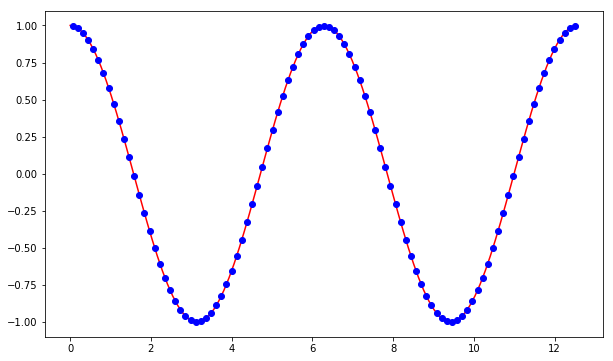

In [132]:
f = np.sin(x)
df = (f[1:]-f[:-1])/ dx
plt.plot(x, np.cos(x), 'r', 0.5*(x[:-1]+x[1:]), df, 'bo' );

### Exercise

Compute derivative using the second order formula:

$$
    \frac{\partial f_i}{\partial x} \sim \frac{f_{i+1}-f_{i-1}}{2dx}
$$




In [133]:
f = np.sin(x)
df = (f[2:]-f[:-2])/ (2*dx)
df.size

98

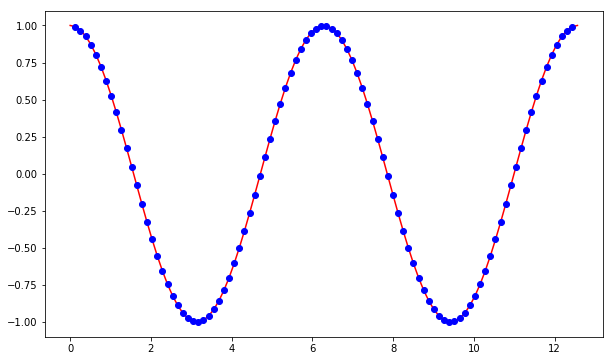

In [134]:
plt.plot(x, np.cos(x), 'r', x[1:-1], df, 'bo' );

In [135]:
f = np.sin(x)
df = np.gradient(f)/dx

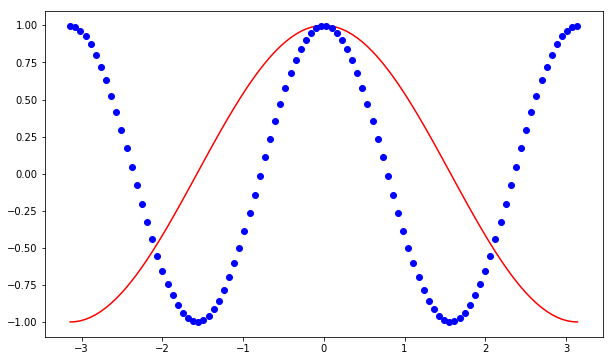

In [176]:
plt.plot(x, np.cos(x), 'r', x, df, 'bo' );

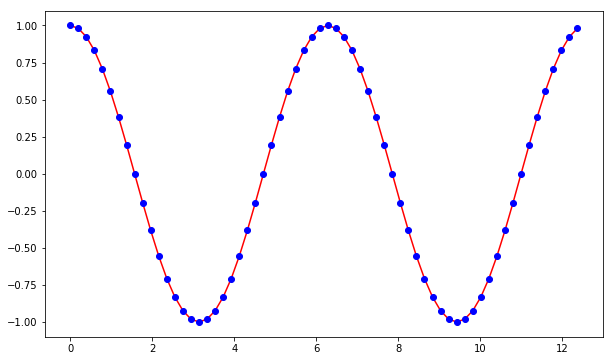

In [202]:
n = 64
x = np.linspace(0,4*np.pi,n, endpoint=False)
kx =2*np.pi/(4*np.pi)*np.concatenate((np.arange(n//2),np.arange(-n//2,0)))
f = np.sin(x)
df = np.real(np.fft.ifft(1j * kx * np.fft.fft(f)))
plt.plot(x, np.cos(x), 'r', x, df, 'bo' );

## Multidimensional array

In [137]:
a = np.arange(4*5).reshape(4,5) 

In [167]:
a

0
1
2
3
⋮
996
997
998
999


In [174]:
x = np.linspace(-np.pi,np.pi,100)
y = np.linspace(-np.pi,np.pi,100)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.exp(-(xx-1)*(xx-1)/0.1)*np.exp(-(yy-1)*(yy-1)/0.1)

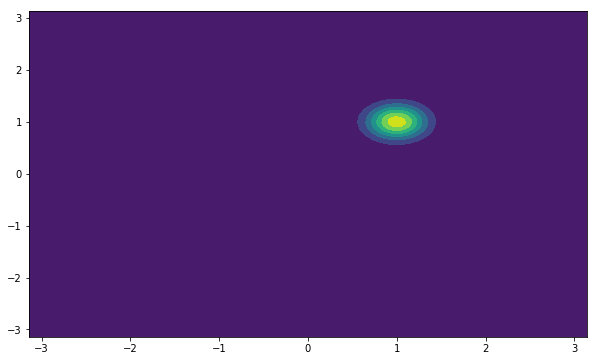

In [175]:
plt.contourf(x,y,z)

In [ ]:
fstrang= copy(f0)
fjo= copy(f0)

for n in range(Nt):

    for i, xx in enumerate(x):
        fstrang[i,:]=real(ifft(exp(ky*1j*xx*dt/2) * fft(fstrang[i,:])))

    for j, yy in enumerate(y):
        fstrang[:,j]=real(ifft(exp(-1j*yy*kx*dt) * fft(fstrang[:,j])))

    for i in range(Nx):
        fstrang[i,:]=real(ifft(exp(1j*xx*ky*dt/2)*fft(fstrang[i,:])))

    for i, xx in enumerate(x):
        fjo[i,:]=real(ifft(exp(1j*xx*ky*tan(dt/2))*fft(fjo[i,:])))

    for j, yy in enumerate(y):
        fjo[:,j]=real(ifft(exp(-1j*yy*kx*sin(dt))*fft(fjo[:,j])))

    for i, xx in enumerate(x):
        fjo[i,:]=real(ifft(exp(1j*xx*ky*tan(dt/2))*fft(fjo[i,:])))

# Slices Are References
- Slices are references to memory in the original array.
- Changing values in a slice also changes the original array.



In [152]:
a = np.arange(10)
b = a[3:6]
b  # `b` is a view of array `a` and `a` is called base of `b`

3
4
5


In [153]:
b[0] = -1
a  # you change a view the base is changed.

0
1
2
-1
⋮
6
7
8
9


In [156]:
c = a[7:8].copy() # Explicit copy of the array slice
c[0] = -1 
a

0
1
2
-1
⋮
6
7
8
9


# Fancy Indexing

In [157]:
a = np.random.randint(20, size=(4, 5))
a

11,15,14,9,15
19,2,12,7,5
9,10,7,8,17
4,1,14,4,10


In [158]:
locations = a % 3 == 0 # locations can be used as a mask
a[locations] = 0 #set to 0 only the values that are divisible by 3
a

11,0,14,0,0
19,2,0,7,5
0,10,7,8,17
4,1,14,4,10


In [159]:
a += a == 0
a

11,1,14,1,1
19,2,1,7,5
1,10,7,8,17
4,1,14,4,10


# Array Operations over a given axis

In [160]:
a = np.arange(20).reshape(5,4)
a

0,1,2,3
4,5,6,7
8,9,10,11
12,13,14,15
16,17,18,19


In [161]:
a.sum(axis=0) # sum of each column

40
45
50
55


# Broadcasting rules

Broadcasting rules allow you to make an outer product between two vectors: the first method involves array tiling, the second one involves broadcasting. The last method is significantly faster.



In [163]:
n = 1000
a = np.arange(n)
ac = a[:, np.newaxis]   # column matrix
ar = a[np.newaxis, :]   # row matrix

In [164]:
%timeit np.tile(a, (n,1)).T * np.tile(a, (n,1))

11.7 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [165]:
%timeit ac * ar

1.75 ms ± 20.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [166]:
np.all(np.tile(a, (n,1)).T * np.tile(a, (n,1)) == ac * ar)

True

In [155]:
def init(n):
 
    u = np.ones((n+2,n+2))
    v = np.zeros((n+2,n+2))
    
    x, y = np.meshgrid(np.linspace(0, 1, n+2), np.linspace(0, 1, n+2))

    mask = (0.4<x) & (x<0.6) & (0.4<y) & (y<0.6)
    
    u[mask] = 0.50
    v[mask] = 0.25
        
    return u, v

Redefine the laplacian function using numpy arrays operations.

In [146]:

def laplacian(u):
    """
    second order finite differences
    """
    return (                  u[ :-2, 1:-1] +
             u[1:-1, :-2] - 4*u[1:-1, 1:-1] + u[1:-1, 2:] +
                          +   u[2:  , 1:-1] )

In [147]:
%timeit laplacian(u)

94.3 µs ± 3.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Periodic domain

In [141]:
def periodic_bc(u):
    u[0, :] = u[-2, :]
    u[-1, :] = u[1, :]
    u[:, 0] = u[:, -2]
    u[:, -1] = u[:, 1]

In [142]:
def grayscott(U, V, Du, Dv, F, k):
    
    u, v = U[1:-1,1:-1], V[1:-1,1:-1]

    Lu = laplacian(U)
    Lv = laplacian(V)

    uvv = u*v*v
    u += Du*Lu - uvv + F*(1 - u)
    v += Dv*Lv + uvv - (F + k)*v

    periodic_bc(U)
    periodic_bc(V)

In [143]:
%%time
from tqdm import tqdm_notebook as tqdm
from PIL import Image
U, V = init(300)

def create_image():
    global U, V
    for t in range(40):
        grayscott(U, V, Du, Dv, F, k)
    V_scaled = np.uint8(255*(V-V.min()) / (V.max()-V.min()))
    return V_scaled

def create_frames(n):

    return [create_image() for i in tqdm(range(n))]
    
frames = create_frames(500)

CPU times: user 43.7 s, sys: 369 ms, total: 44.1 s
Wall time: 44 s


In [145]:
import imageio
frames_scaled = [np.uint8(255 * frame) for frame in frames]
imageio.mimsave('movie.gif', frames_scaled, format='gif', fps=60)

![grayscott](movie.gif "grayscott")